## Credit Classification

This dataset classifies people described by a set of attributes as good or bad credit risks.<br>
Source : https://www.openml.org/d/31

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('credit.csv')

In [3]:
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_status           1000 non-null object
duration                  1000 non-null int64
credit_history            1000 non-null object
purpose                   1000 non-null object
credit_amount             1000 non-null int64
savings_status            1000 non-null object
employment                1000 non-null object
installment_commitment    1000 non-null int64
personal_status           1000 non-null object
other_parties             1000 non-null object
residence_since           1000 non-null int64
property_magnitude        1000 non-null object
age                       1000 non-null int64
other_payment_plans       1000 non-null object
housing                   1000 non-null object
existing_credits          1000 non-null int64
job                       1000 non-null object
num_dependents            1000 non-null int64
own_telephone             1000 non-null object
foreign_

Here duration, credit_amount, installment_commitment, residence_since, age, num_dependents are numerical, but other need to type change to category  

In [5]:
data.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

Here changing duration to months, property_magnitude to property, personal_status to status and class to credit_type

In [6]:
data.columns = (['checking_status', 'months', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'status', 'other_parties',
       'residence_since', 'property', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'credit_type'
])

Fixing data type and removing quotes 

In [7]:
data.checking_status = data.checking_status.astype(str)
data.checking_status = data.checking_status.replace('\'', '',regex=True).astype('category')

data.credit_history = data.credit_history.astype(str)
data.credit_history = data.credit_history.replace('\'', '',regex=True).astype('category')

data.purpose = data.purpose.astype(str)
data.purpose = data.purpose.replace('\'', '',regex=True).astype('category')

data.savings_status = data.savings_status.astype(str)
data.savings_status = data.savings_status.replace('\'', '',regex=True).astype('category')

data.employment = data.employment.astype(str)
data.employment = data.employment.replace('\'', '',regex=True).astype('category')

data.status = data.status.astype(str)
data.status = data.status.replace('\'', '',regex=True).astype('category')

data.other_parties = data.other_parties.astype(str)
data.other_parties = data.other_parties.replace('\'', '',regex=True).astype('category')

data.property = data.property.astype(str)
data.property = data.property.replace('\'', '',regex=True).astype('category')

data.other_payment_plans = data.other_payment_plans.astype(str)
data.other_payment_plans = data.other_payment_plans.replace('\'', '',regex=True).astype('category')

data.housing = data.housing.astype(str)
data.housing = data.housing.replace('\'', '',regex=True).astype('category')

data.job = data.job.astype(str)
data.job = data.job.replace('\'', '',regex=True).astype('category')

data.own_telephone = data.own_telephone.astype(str)
data.own_telephone = data.own_telephone.replace('\'', '',regex=True).astype('category')

data.foreign_worker = data.foreign_worker.astype('category')

data.credit_type = data.credit_type.astype('category')

Data is typecast to prefered type 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_status           1000 non-null category
months                    1000 non-null int64
credit_history            1000 non-null category
purpose                   1000 non-null category
credit_amount             1000 non-null int64
savings_status            1000 non-null category
employment                1000 non-null category
installment_commitment    1000 non-null int64
status                    1000 non-null category
other_parties             1000 non-null category
residence_since           1000 non-null int64
property                  1000 non-null category
age                       1000 non-null int64
other_payment_plans       1000 non-null category
housing                   1000 non-null category
existing_credits          1000 non-null int64
job                       1000 non-null category
num_dependents            1000 non-null int64
own_telephone             1000 no

In [9]:
data.isnull().sum()

checking_status           0
months                    0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
status                    0
other_parties             0
residence_since           0
property                  0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
credit_type               0
dtype: int64

Their is no missing value

We look some basic static of data

In [10]:
data.describe()

,months,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [11]:
data.describe(include=['category'])

,checking_status,credit_history,purpose,savings_status,employment,status,other_parties,property,other_payment_plans,housing,job,own_telephone,foreign_worker,credit_type
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2,2
top,no checking,existing paid,radio/tv,<100,1<=X<4,male single,none,car,none,own,skilled,none,yes,good
freq,394,530,280,603,339,548,907,332,814,713,630,596,963,700


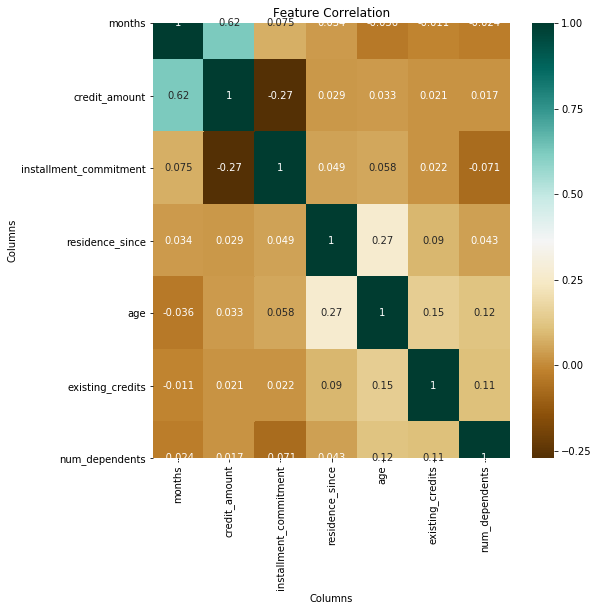

In [12]:
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(data.corr(), annot=True, ax=ax, cmap='BrBG').set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()

Some insights from the above correlation heatmap: 

1. expected stronge correlation between months and credit_amount
2. expected stronge correlation between installment_commitment and credit_amount

chaning credit_type to good to 1 and bad to 0

In [13]:
credit_type = {'good':1,'bad':0}

In [14]:
data.credit_type = [credit_type[item] for item in data.credit_type] 
data.head(3)

,checking_status,months,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,status,other_parties,...,property,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,credit_type
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,1
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,0
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1


In [15]:
pd.crosstab(data.credit_type, data.checking_status)

checking_status,0<=X<200,<0,>=200,no checking
credit_type,,,,
0,105,135,14,46
1,164,139,49,348


Here, no checking has most of good credit type

In [16]:
pd.crosstab(data.credit_type, data.status)

status,female div/dep/mar,male div/sep,male mar/wid,male single
credit_type,,,,
0,109,20,25,146
1,201,30,67,402


Here, single male has more good credits

In [17]:
data['purpose'].value_counts()

radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
other                   12
domestic appliance      12
retraining               9
Name: purpose, dtype: int64

In [18]:
pd.crosstab(data.credit_type, data.purpose)

purpose,business,domestic appliance,education,furniture/equipment,new car,other,radio/tv,repairs,retraining,used car
credit_type,,,,,,,,,,
0,34,4,22,58,89,5,62,8,1,17
1,63,8,28,123,145,7,218,14,8,86


Here, lot of people use credit for radio/TV and for car

In [19]:
pd.crosstab(data.credit_type, data.savings_status)

savings_status,100<=X<500,500<=X<1000,<100,>=1000,no known savings
credit_type,,,,,
0,34,11,217,6,32
1,69,52,386,42,151


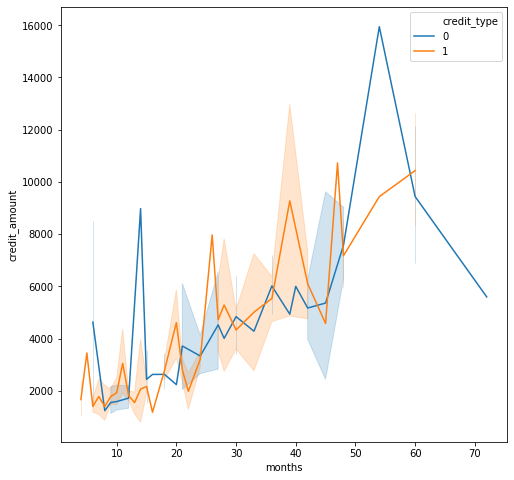

In [20]:
fig, ax = plt.subplots(figsize=(8,8)) 
sns.lineplot(x='months', y='credit_amount', hue='credit_type', data=data)

In [21]:
data.head(3)

,checking_status,months,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,status,other_parties,...,property,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,credit_type
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,1
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,0
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1


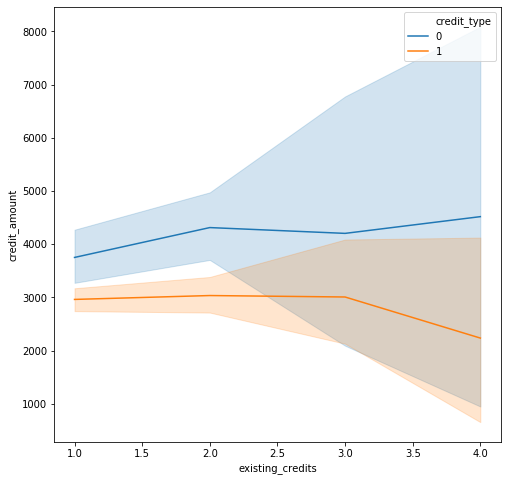

In [22]:
fig, ax = plt.subplots(figsize=(8,8)) 
sns.lineplot(x='existing_credits', y='credit_amount', hue='credit_type', data=data)